# MNIST Tutorial
Here be the MNIST Tutorial! For now we'll just load up the data and maybe look at it.

For now, we're looking at this [link, which is how to load up minst datasets in Python.](https://www.digitalocean.com/community/tutorials/mnist-dataset-in-python) Note that we reference this [more in-depth tutorial](https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/) later on.

Overall, the steps for machine learning are as follows:
- Load the Data
- Prepare & Normalize the Data
- Defining a Neural Network Model
- Evaluating the Model on how successful it was
- Present Results

### Loading the Data

In [7]:
from tensorflow.keras.datasets import mnist

# LOAD THE DATA?!
(train_X, train_y), (test_X, test_y) = mnist.load_data()

print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


And now, to actually do tutorial related stuff with it. I found a more [in-depth tutorial here](https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/) that I'll be using.

For starters though, this is plotting the first nine elements of the data so we can see what it looks like.

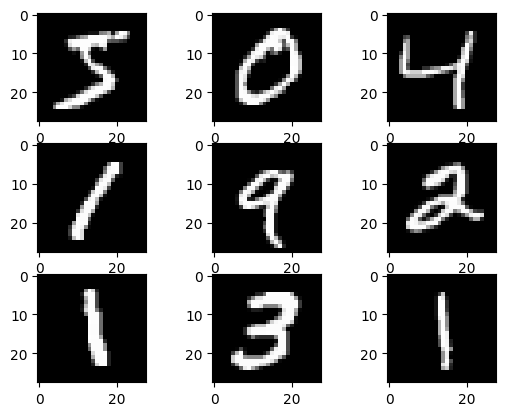

In [2]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

(train_X, train_y), (test_X, test_y) = mnist.load_data()
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    
# show the figure
plt.show()

### Helper Functions (Loading & Normalizing Data)

Now that we've looked at the data a bit, we come to the first step in our machine learning analysis - developing/creating a baseline model. From what I understand, this means developing the infastructure for the test harness so that any machine learning model designed can be evaluated on the dataset, and it establishes a baseline for model performance on the problem/dataset.

Anyways, the first step is to **load the dataset** and munge it slightly so that we can work with it. 

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# load train and test dataset
def load_dataset():
    (train_X, train_y), (test_X, test_y) = mnist.load_data()

    # Reshape dataset to have a single color channel
    train_X = train_X.reshape((trainX.shape[0], 28, 28, 1))
    test_X = test_X.reshape((testX.shape[0], 28, 28, 1))

    # This is a way to categorize the data - these are the "answers" so to speak, so we want to keep track of them.
    train_Y = to_categorical(train_Y)
    test_Y = to_categorical(test_Y)
    
    return train_X, train_y, test_X, test_Y

Next up, we need to **prepare the pixel data**. Basically, the pixels that make up the images are unsigned integers in the range between black and white, or 0 and 255. Basically, we want to normalize the data so that it's **between** 0 and 1. _Not_ 0 or 1 - _between_ 0 and 1.

So as such, writing a function to normalize them is a good next step:

In [ ]:
# Normalize Pixel Values
def prep_pixels(train, test):
    # convert from Integers to Floats
    train_normalized = train.astype('float32')
    test_normalized = test.astype('float32')
    
    # Normalize to range [0, 1]
    train_normalized = train_normalized / 255.0
    test_normalized = test_normalized / 255.0
    
    # return normalized images
    return train_normalized, test_normalized

### Defining a Neural Network Model

For the next step, we need to define a "baseline convolutional neural network model" for the task at hand.

Very quickly as an aside, here are the tutorials for
- [Convolutional Layers and how they relate to Deep Learning Neural Networks](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/)
- [An introduction to Pooling Layers for Convolutional Neural Networks](https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/)

Note that I'll need to write up separate pages for these later, but at a glance it seems like Convolutional and Pooling layers are used to identify the pixels and give them weights. So because we've normalized them so they're between 0 and 1, the layers are used to identify which of those pixels are ink and which are empty space... at least that's how I understand it. Will have to do more reading.

Moreover, when we define the model there are some other relevant terms we should be aware of:
- [Rectified Linear Activation Function (ReLU)](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)
- [Learning Rate](https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/)
- [Cross Entropy for Machine Learning](https://machinelearningmastery.com/cross-entropy-for-machine-learning/)

Anyways,

Here is how we define our model:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

# Define our CNN Model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

### Evaluating our Neural Network Model

Once we've defined our Neural Network Model, we need to go ahead and evaluate it to determine how accurate it is. This model is evaluated using [five-fold cross-validation.](https://machinelearningmastery.com/k-fold-cross-validation/)

Note there are some other details on the tutorial website, but I've elected to not include them in the interest of keeping this tutorial light. Anyways, here is how we evaluate the model:

In [2]:
from sklearn.model_selection import KFold

# Evaluate a Model using K-Fold Cross-Validation
def evaluate_model(data_X, data_Y, n_folds=5):
    scores, histories = list(), list()
    
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    
    # enumerate splits
    for train_ix, test_ix in kfold.split(data_X):
        # Define the Model
        model = define_model()
        
        # select rows for train and test
        train_X, train_Y, test_X, test_Y = data_X[train_ix], data_Y[train_ix], data_X[test_ix], data_Y[test_ix]
        
        # fit model
        history = model.fit(train_X, train_Y, epochs=10, batch_size=32, validation_data=(test_X, test_Y), verbose=0)
        
        # evaluate model
        _, accuracy = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (accuracy * 100.0))
        
        # stores scores
        scores.append(acc)
        histories.append(history)
        
    return scores, histories

### Present Results (I.E., Plotting the Data)

Once we've evaluated our model and we're happy with it's accuracy, we can go ahead and plot the results. There are two things that we can "present" - 1) The diagnostics of learning behaviour of the model during training, and 2) the estimation of the model's performance.

Plotting the diagnostics of the model's learning behaviour is useful in determining if a model is overfitting, underfitting or has a good fit for the dataset. Plotting the model's accuracy scores is as straightforward as it sounds.

Here is the code:

In [3]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt

# Plot Diagnostic Learning Curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        
        # plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
        
    plt.show()
    
# Summarize Model Performance
def summarize_performance(scores):
    # Print ze summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # Box and Whisker Plots of Results
    plt.boxplot(scores)
    plt.show()

### Complete Example (Bringing it all together)

Now we need a function that will go ahead and drive the test harness (`run_test_harness`), but now we take all of the functions we defined before and put them all together:

> 98.442
> 98.450
> 98.617
> 98.867
> 98.725


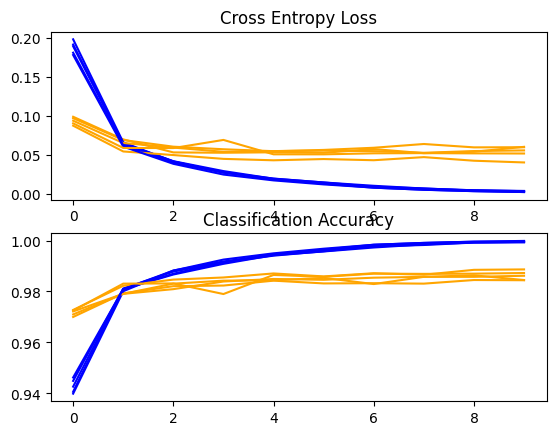

Accuracy: mean=98.620 std=0.163, n=5


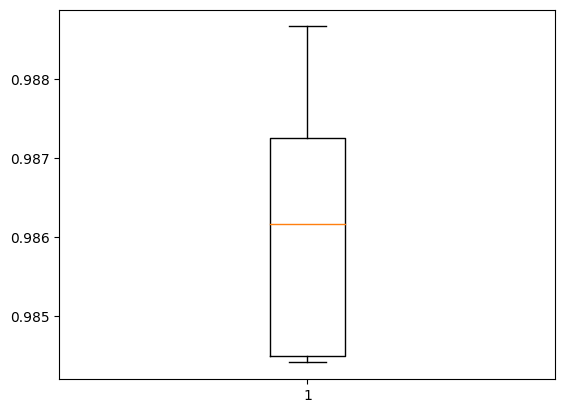

In [4]:
# Baseline CNN Model for MNIST
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
 
# load train and test dataset
def load_dataset():
    (train_X, train_y), (test_X, test_y) = mnist.load_data()

    # Reshape dataset to have a single color channel
    train_X = train_X.reshape((trainX.shape[0], 28, 28, 1))
    test_X = test_X.reshape((testX.shape[0], 28, 28, 1))

    # This is a way to categorize the data - these are the "answers" so to speak, so we want to keep track of them.
    train_Y = to_categorical(train_Y)
    test_Y = to_categorical(test_Y)
    
    return train_X, train_y, test_X, test_Y
 
# Normalize Pixel Values
def prep_pixels(train, test):
    # convert from Integers to Floats
    train_normalized = train.astype('float32')
    test_normalized = test.astype('float32')
    
    # Normalize to range [0, 1]
    train_normalized = train_normalized / 255.0
    test_normalized = test_normalized / 255.0
    
    # return normalized images
    return train_normalized, test_normalized
 
# Define our CNN Model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model
 
# Evaluate a Model using K-Fold Cross-Validation
def evaluate_model(data_X, data_Y, n_folds=5):
    scores, histories = list(), list()
    
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    
    # enumerate splits
    for train_ix, test_ix in kfold.split(data_X):
        # Define the Model
        model = define_model()
        
        # select rows for train and test
        train_X, train_Y, test_X, test_Y = data_X[train_ix], data_Y[train_ix], data_X[test_ix], data_Y[test_ix]
        
        # fit model
        history = model.fit(train_X, train_Y, epochs=10, batch_size=32, validation_data=(test_X, test_Y), verbose=0)
        
        # evaluate model
        _, accuracy = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (accuracy * 100.0))
        
        # stores scores
        scores.append(acc)
        histories.append(history)
        
    return scores, histories
 
# Plot Diagnostic Learning Curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        
        # plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
        
    plt.show()
    
# Summarize Model Performance
def summarize_performance(scores):
    # Print ze summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # Box and Whisker Plots of Results
    plt.boxplot(scores)
    plt.show()
 
# Run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    train_X, train_Y, test_X, test_Y = load_dataset()
    # prepare pixel data
    train_X, test_X = prep_pixels(train_X, test_X)
    # evaluate model
    scores, histories = evaluate_model(train_X, train_Y)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)
 
# Entrypoint, run the test harness!
run_test_harness()

### Assorted and Random Notes

- What is [k-fold Cross Validation?](https://machinelearningmastery.com/k-fold-cross-validation/) (This is a very good resource, worth investigating)